# Boundary time crystals

Notebook author: Nathan Shammah (nathan.shammah at gmail.com)

We apply the Permutational Invariant Quantum Solver (PIQS) [1] to the study of the following driven-dissipative dynamics
\begin{eqnarray}
\dot{\rho} = \mathcal{D}_\text{TLS}(\rho) &=& 
-\frac{i}{\hbar}\lbrack H,\rho \rbrack
+\frac{\gamma_\text{CE}}{2}\mathcal{L}_{J_{-}}[\rho]
\nonumber\\
&&+\sum_{n=1}^{N}\left(
\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]
+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{z,n}}[\rho]\right)
\end{eqnarray}

where $J_{\alpha,n}=\frac{1}{2}\sigma_{\alpha,n}$ are SU(2) Pauli spin operators, with ${\alpha=x,y,z}$ and $J_{\pm,n}=\sigma_{\pm,n}$. The collective spin operators are $J_{\alpha} = \sum_{n}J_{\alpha,n}$. The Lindblad super-operators are $\mathcal{L}_{A} = 2A\rho A^\dagger - A^\dagger A \rho - \rho A^\dagger A$.

Here the rates $\gamma_\text{CE}$ (gCE), $\gamma_\text{E}$ (gE) and $\gamma_\text{D}$ quantify collective emission, local emission and local dephasing. 

Here we study the Hamiltonian $H=\hbar\omega_x J_x$, which has been studied in the context of quantum optics in Refs. [2,3].

The collective driven-dissipative dynamics has been studied in the regime $\gamma_\text{E}=\gamma_\text{D}=0$ and in the context of quantum phase transitions (QPTs) in Ref. [4].

Below we will study the spectrum of the Liouvillian [5] in the two parameter regimes found in Ref. [4], that of strong and of weak dissipation. If only collective processes are present, one can efficiently study the system's dynamics in the reduced symmetric space, whose Hilbert space dimension is only (N+1). We will do so using QuTiP's jmat() functions [6]. 

We then generalize the study of the collective dynamics to include local terms. 

In [1]:
from time import clock
from scipy.io import mmwrite
import matplotlib.pyplot as plt

from qutip import *
from qutip.piqs import *

## Spectrum of the Liouvillian - Strong dissipation limit  $\omega_{0} = 0.5 \kappa $

In [2]:
nnn = 10
N = nnn
jj_mat = nnn/2
[jx_mat, jy_mat, jz_mat] = jmat(jj_mat)
jp_mat = jx_mat + 1j * jy_mat
jm_mat = jx_mat - 1j * jy_mat

In [3]:
w0 = 1
kappa = 2 * w0 
gg = kappa/ jj_mat
ham = w0 * jx_mat
c_ops = [np.sqrt(gg) * jm_mat]
liouv_mat = liouvillian(ham, c_ops)

In [4]:
print(liouv_mat.shape)
eig_mat = liouv_mat.eigenenergies()
re_eigmat = np.real(eig_mat)
imag_eigmat = np.imag(eig_mat)

(121, 121)


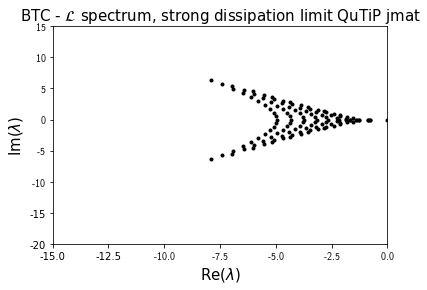

In [5]:
fig6 = plt.figure(6)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.')
label_size = 15
label_size2 = 15
label_size3 = 15
plt.rc('text', usetex = True)
plt.title(r'BTC - $\mathcal{L}$ spectrum, strong dissipation limit QuTiP jmat', fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-20,15])
plt.xlim([-15,0])

plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'btc_eig_N{}_strong_jmat.pdf'.format(N)
savefile = False
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()


In [6]:
#Saving for Mathematica
liouvd_jmat =liouv_mat.full()
liouvd_re_jmat = np.real(liouvd_jmat)
liouvd_imag_jmat = np.imag(liouvd_jmat)
#saveto_file_name2 = str("re_liouv_N={}".format(N))
#liouvd_re.astype('float32').tofile('{}.dat'.format(saveto_file_name2))
#saveto_file_name3 = str("imag_liouv_N={}".format(N))
#liouvd_imag.astype('float32').tofile('{}.dat'.format(saveto_file_name3))
#mmwrite('liouvrejmat.mtx', liouvd_re_jmat/kappa)
#mmwrite('liouvimjmat.mtx', liouvd_imag_jmat/kappa)

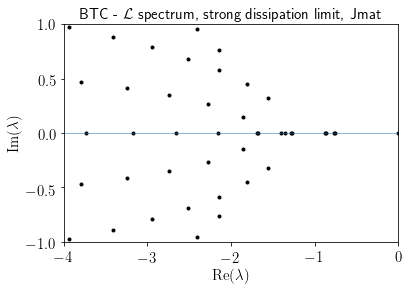

In [7]:
fig7 = plt.figure(7)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.', re_eigmat/kappa, 0*imag_eigmat/kappa, '-', lw = 0.5)
label_size = 15
label_size2 = 15
label_size3 = 15
plt.title(r'BTC - $\mathcal{L}$ spectrum, strong dissipation limit, Jmat', fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-1,1])
plt.xlim([-4,0])


plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'btc_eig_inset_N{}_strong_jmat.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

The Figure above reproduces qualitatively the study performed in Ref. [4].

## Spectrum of the Liouvillian - Weak dissipation limit  $\omega_{0} = 1.5 \kappa $

In [8]:
nnn = 36
N = nnn
jj_mat = nnn/2
[jx_mat, jy_mat, jz_mat] = jmat(jj_mat)
jp_mat = jx_mat + 1j * jy_mat
jm_mat = jx_mat - 1j * jy_mat
w0 = 1
kappa = 2/3 * w0 
gg = kappa/ jj_mat
ham = w0 * jx_mat
c_ops = [np.sqrt(gg) * jm_mat]
liouv_mat = liouvillian(ham, c_ops)

In [9]:
print(liouv_mat.shape)
eig_mat = liouv_mat.eigenenergies()
re_eigmat = np.real(eig_mat)
imag_eigmat = np.imag(eig_mat)

(1369, 1369)


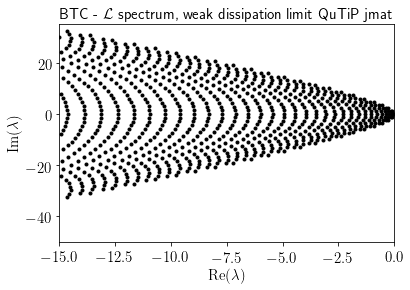

In [10]:
fig8 = plt.figure(8)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.')
label_size = 15
label_size2 = 15
label_size3 = 15
plt.rc('text', usetex = True)
plt.title(r'BTC - $\mathcal{L}$ spectrum,  weak dissipation limit QuTiP jmat', fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-50,35])
plt.xlim([-15,0])

plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'btc_eig_N{}_weak_jmat.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

The Figure above reproduces qualitatively the study performed in Ref. [4].

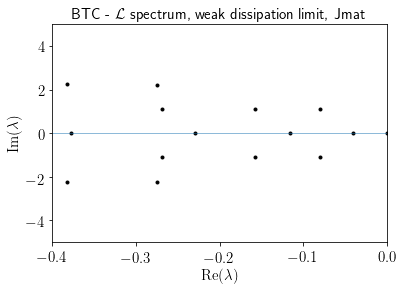

In [11]:
fig9 = plt.figure(9)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.', re_eigmat/kappa, 0*imag_eigmat/kappa, '-', lw = 0.5)
label_size = 15
label_size2 = 15
label_size3 = 15
plt.title(r'BTC - $\mathcal{L}$ spectrum, weak dissipation limit, Jmat', fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-5,5])
plt.xlim([-0.4,0])

plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'btc_eig_inset_N{}_weak_jmat.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

The Figure above reproduces qualitatively the study performed in Ref. [4].

# Time evolution of collective operators, such as $\langle J_z (t)\rangle$

In [28]:
N = 30
ntls = N
nds = num_dicke_states(N)
print("System size: N = ", N, "| nds = ", nds,  "| nds^2 = ", nds**2,   "| 2^N = ", 2**N)
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jp.dag()
jpjm = jp*jm

System size: N =  30 | nds =  256 | nds^2 =  65536 | 2^N =  1073741824


In [29]:
w0 = 1
kappa = 0.5 * w0
gCE = 2*kappa/N
gE = 0
gP = 0
gCD = 0
gCP = 0
h = w0 * jx

nt = 1001
td0 = kappa
tmax = 200 * td0
t = np.linspace(0, tmax, nt)
rho0 = dicke(N, N/2, N/2)

jzt_list = []
jpjmt_list = []
jz2t_list = []
gD_list = [0, 0.01, 0.1, 1]
for gD in gD_list:
    
    print(gD)
    system = Dicke(N=N)
    system.collective_emission = gCE
    system.emission = gE
    system.dephasing = gD
    system.pumping = gP
    system.collective_pumping = gCP
    system.collective_dephasing = gCD
    # energy / dynamics numerical
    system.hamiltonian = h
    liouv = system.liouvillian()
    print(system)
    result = mesolve(liouv, rho0, t, [], e_ops = [jz, jp*jm, jz*jz], options = Options(store_states=True))
    rhot = result.states
    jz_t = result.expect[0]
    jpjm_t = result.expect[1]
    jz2_t = result.expect[2]
    
    jzt_list.append(jz_t)
    jpjmt_list.append(jpjm_t)
    jz2t_list.append(jz2_t)
#    gD_list.append(gD)

0
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
collective_emission = 0.03333333333333333
0.01
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
dephasing = 0.01
collective_emission = 0.03333333333333333
0.1
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
dephasing = 0.1
collective_emission = 0.03333333333333333
1
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
dephasing = 1
collective_emission = 0.03333333333333333


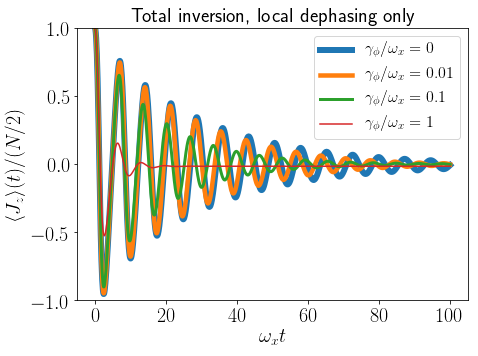

In [32]:
plt.rc('text', usetex = True)
label_size = 20
label_size2 = 20
label_size3 = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
lw = 6
i = 0
fig5 = plt.figure(figsize=(7,5))

for gD in gD_list:
    plt.plot(w0*t, jzt_list[i]/(N/2), '-', 
             label = r"$\gamma_\phi/\omega_x={}$".format(gD), 
             linewidth = lw-1.5*i)
    i = i+1
plt.ylim([-1,1])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_z \rangle (t)/(N/2)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

fname = 'btc-jzt-N{}-gD.pdf'.format(N)
savefile=True
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.title(r'Total inversion, local dephasing only', fontsize = label_size2)
plt.show()
plt.close()

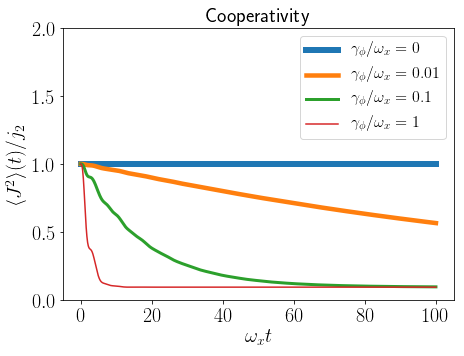

In [33]:
#cooperativity
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
fig8 = plt.figure(figsize=(7,5))
i=0
lw = 6
for gD in gD_list:
    plt.plot(w0*t, (jz2t_list[i] -jzt_list[i] + jpjmt_list[i])/((N/2*(N/2+1))), 
             '-', label = r"$\gamma_\phi/\omega_x={}$".format(gD), 
             linewidth = lw-1.5*i)
    i = i+1
plt.ylim([0,2.])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J^2 \rangle (t)/j_2$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

fname = 'btc-j2t-N{}-gD.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.title(r'Cooperativity', fontsize = label_size2)
plt.show()
plt.close()

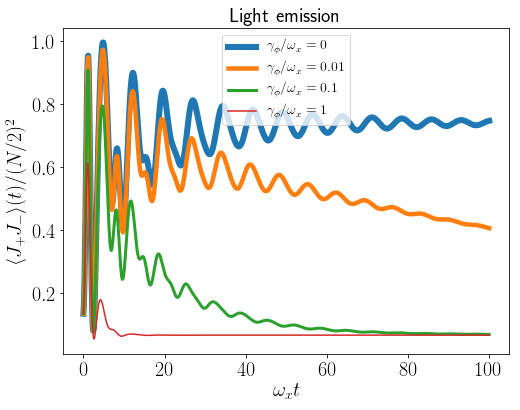

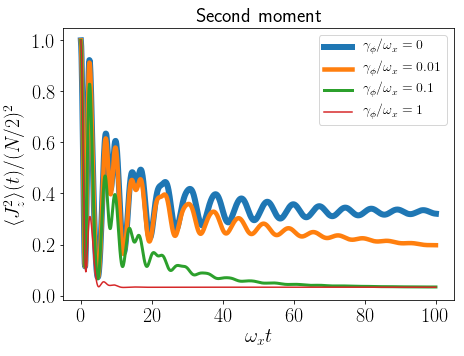

In [34]:
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
fig6 = plt.figure(figsize=(8,6))
lw = 6
i=0
for gD in gD_list:
    plt.plot(w0*t, jpjmt_list[i]/(N/2)**2, label = r"$\gamma_\phi/\omega_x={}$".format(gD), 
             linewidth = lw-1.5*i)
    i = i+1
#plt.ylim([-1,1])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_{+}J_{-} \rangle (t)/(N/2)^2$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.7)
fname = 'btc-jpjmt-N{}-gD.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.title(r'Light emission', fontsize = label_size2)
plt.show()
plt.close()

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
lw =6
fig7 = plt.figure(figsize=(7,5))
i=0
for gD in gD_list:
    plt.plot(w0*t, jz2t_list[i]/(N/2)**2, '-', label = r"$\gamma_\phi/\omega_x={}$".format(gD),
             linewidth = lw-1.5*i)
    i = i+1
#plt.ylim([-1,1])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_z^2 \rangle (t)/(N/2)^2$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.7)
fname = 'btc-jz2t-N{}-gD.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight',loc=2)
plt.title(r'Second moment', fontsize = label_size2)
plt.show()
plt.close()

In [18]:
# Study of collective vs local dephasing
N = 30
ntls = N
nds = num_dicke_states(N)
print("System size: N = ", N, "| nds = ", nds,  "| nds^2 = ", nds**2,   "| 2^N = ", 2**N)
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jp.dag()
jpjm = jp*jm
w0 = 1
kappa = 0.5 * w0
gCE = 2*kappa/N
gE = 0
gP = 0
gCP = 0
h = w0 * jx

nt = 1001
td0 = kappa
tmax = 200 * td0
t = np.linspace(0, tmax, nt)
rho0 = dicke(N, N/2, N/2)

jzt_list2 = []
jpjmt_list2 = []
jz2t_list2 = []
gD_list = [0, 0.01, 0.1, 1]
for gD in gD_list:
    
    print(gD)
    system = Dicke(N=N)
    system.collective_emission = gCE
    system.emission = gE
    system.dephasing = 0
    system.pumping = gP
    system.collective_pumping = gCP
    system.collective_dephasing = gD
    # energy / dynamics numerical
    system.hamiltonian = h
    liouv = system.liouvillian()
    print(system)
    result = mesolve(liouv, rho0, t, [], e_ops = [jz, jp*jm, jz*jz], options = Options(store_states=True))
    rhot2 = result.states
    jz_t2 = result.expect[0]
    jpjm_t2 = result.expect[1]
    jz2_t2 = result.expect[2]
    
    jzt_list2.append(jz_t2)
    jpjmt_list2.append(jpjm_t2)
    jz2t_list2.append(jz2_t2)
#    gD_list.append(gD)

System size: N =  30 | nds =  256 | nds^2 =  65536 | 2^N =  1073741824
0
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
collective_emission = 0.03333333333333333
0.01
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
collective_emission = 0.03333333333333333
collective_dephasing = 0.01
0.1
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
collective_emission = 0.03333333333333333
collective_dephasing = 0.1
1
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
collective_emission = 0.03333333333333333
collective_dephasing = 1


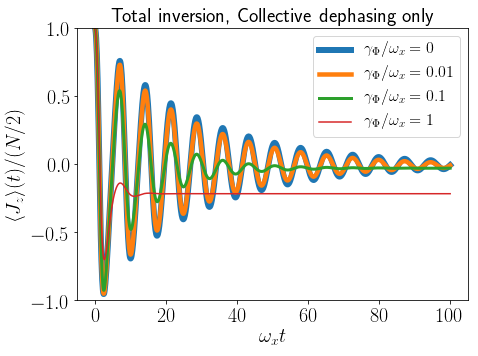

In [36]:
# Study of collective dephasing

plt.rc('text', usetex = True)
label_size = 20
label_size2 = 20
label_size3 = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
lw = 6
i = 0
fig5 = plt.figure(figsize=(7,5))

for gD in gD_list:
    plt.plot(w0*t, jzt_list2[i]/(N/2), '-', 
             label = r"$\gamma_\Phi/\omega_x={}$".format(gD), linewidth = lw-1.5*i)
    i = i+1
plt.ylim([-1,1])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_z \rangle (t)/(N/2)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

fname = 'btc-jzt-N{}-gCD.pdf'.format(N)
savefile = True
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.title(r'Total inversion, Collective dephasing only', fontsize = label_size2)
plt.show()
plt.close()

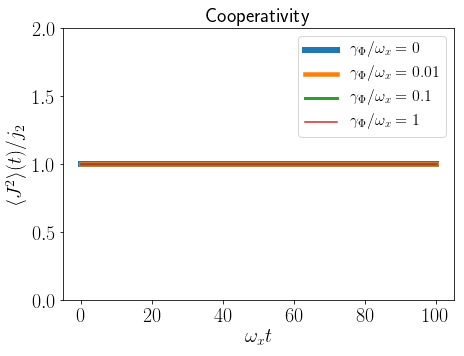

In [37]:
#cooperativity
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
fig8 = plt.figure(figsize=(7,5))
i=0
lw = 6
for gD in gD_list:
    plt.plot(w0*t, (jz2t_list2[i] -jzt_list2[i] + jpjmt_list2[i])/((N/2*(N/2+1))), 
             '-', label = r"$\gamma_\Phi/\omega_x={}$".format(gD), linewidth = lw-1.5*i)
    i = i+1
plt.ylim([0,2.])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J^2 \rangle (t)/j_2$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)
savefile = True
fname = 'btc-j2t-N{}-gCD.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.title(r'Cooperativity', fontsize = label_size2)
plt.show()
plt.close()

In [21]:
# Study of local incoherent losses
N = 30
print(N)
w0 = 1
kappa = 0.5 * w0
gCE = 2*kappa /N
gE = 0
gP = 0
gD = 0
gCD = 0
gCP = 0
gD = 0
h = w0 * jx

nt = 1001
td0 = kappa
tmax = 200 * td0
t = np.linspace(0, tmax, nt)
rho0 = dicke(N, N/2, N/2)

jzt_list = []
jpjmt_list = []
jz2t_list = []
gE_list = [0, 0.01, 0.1, 1]
for gE in gE_list:
    print(gE)
    system = Dicke(N=N)
    system.collective_emission = gCE
    system.emission = gE
    system.dephasing = gD
    system.pumping = gP
    system.collective_pumping = gCP
    system.collective_dephasing = gCD
    # energy / dynamics numerical
    system.hamiltonian = h
    liouv = system.liouvillian()
    print(system)
    result = mesolve(liouv, rho0, t, [], e_ops = [jz, jp*jm, jz*jz], options = Options(store_states=True))
    rhot = result.states
    jz_t = result.expect[0]
    jpjm_t = result.expect[1]
    jz2_t = result.expect[2]
    
    jzt_list.append(jz_t)
    jpjmt_list.append(jpjm_t)
    jz2t_list.append(jz2_t)
#    gD_list.append(gD)

30
0
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
collective_emission = 0.03333333333333333
0.01
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
emission = 0.01
collective_emission = 0.03333333333333333
0.1
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
emission = 0.1
collective_emission = 0.03333333333333333
1
N = 30
Hilbert space dim = (256, 256)
Number of Dicke states = 256
Liouvillian space dim = (65536, 65536)
emission = 1
collective_emission = 0.03333333333333333


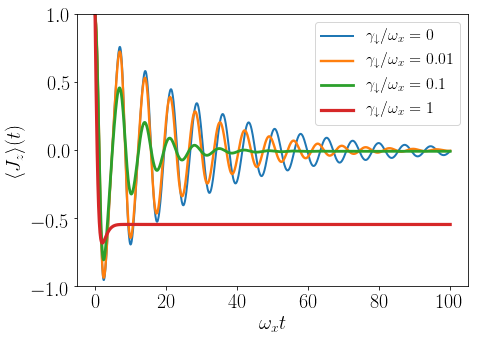

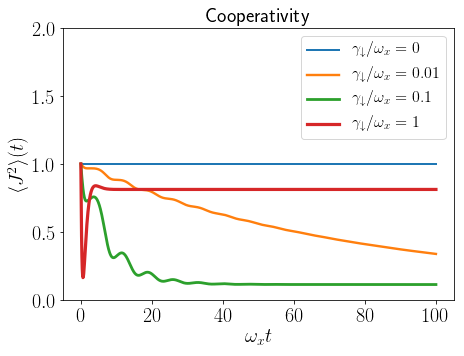

In [22]:
plt.rc('text', usetex = True)
label_size = 20
label_size2 = 20
label_size3 = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
lw = 1
i = 0
fig5 = plt.figure(figsize=(7,5))

for gD in gD_list:
    plt.plot(w0*t, jzt_list[i]/(N/2), '-', label = r"$\gamma_\downarrow/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
plt.ylim([-1,1])
#plt.title(r'Total inversion', fontsize = label_size2)

plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_z \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

fname = 'btc_jzt_N{}_gE.pdf'.format(N)
if savefile == True:  
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

#cooperativity
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
fig8 = plt.figure(figsize=(7,5))
i=0
for gD in gD_list:
    plt.plot(w0*t, (jz2t_list[i] -jzt_list[i] + jpjmt_list[i])/((N/2*(N/2+1))), 
             '-', label = r"$\gamma_\downarrow/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
plt.ylim([0,2.])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J^2 \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

fname = 'btc_j2t_N{}_gE.pdf'.format(N)
if savefile == True:  
    plt.savefig(fname, bbox_inches='tight')
plt.title(r'Cooperativity', fontsize = label_size2)
plt.show()
plt.close()

The plots above integrate the study on the effect of local dissipation performed in Ref. [1].

#### References

[1] N. Shammah, S. Ahmed, N. Lambert, S. De Liberato, and F. Nori, Open quantum systems with local and collective incoherent processes: Efficient numerical simulation using permutational invariance, **Phys. Rev. A 98, 063815 (2018)** https://arxiv.org/abs/1805.05129 and https://github.com/nathanshammah/piqs/

The PIQS library can be found at https://github.com/nathanshammah/piqs/

[2] R. Bonifacio and L. A. Lugiato, Optical bistability and cooperative effects in resonance fluorescence, *Phys. Rev. A* **18**, 1129 (1978)

[3] S. Sarkar and J. S. Satchell, Optical bistability with small numbers of atoms, *Europhys. Lett.* **3**, 797 (1987)

[4] F. Iemini, A. Russomanno, J. Keeling, M. Schirò, M. Dalmonte, and R. Fazio, Boundary Time Crystals, arXiv:1708.05014 (2017)

[5] V. V. Albert and L. Jiang, Symmetries and conserved quantities in Lindblad master equations, *Phys. Rev. A* **89**, 022118 (2014)

[6] J.R. Johansson, P.D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012) http://qutip.org


In [ ]:
qutip.about()